In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

# https://scryfall.com/docs/api/bulk-data # (download list)
# https://scryfall.com/docs/api/cards # (feature descriptions)
# default-cards-20220719210549.json - 7/19/2022

In [2]:
# load csv to df

all_cards = pd.read_json(r'C:\Users\mitch\OneDrive\Documents\MTG_Data\Dowloaded_Set_Lists\default-cards-20220719210549.json')

# with open('Alpha_Unfinity', 'wb') as f:
#     pickle.dump(all_cards,f)
    
# with open('Alpha_Unfinity', 'rb') as f:
#     all_cards = pickle.load(f)
# all_cards.shape

In [3]:
# drop 50 unncessesary columns

drop_cols = ['object', 'id', 'oracle_id', 'multiverse_ids', 'mtgo_id', 'mtgo_foil_id', 'tcgplayer_id','cardmarket_id', 
            'uri', 'scryfall_uri', 'layout', 'highres_image', 'image_status', 'image_uris',
            'oversized', 'promo', 'set_id', 'set_uri', 'set_search_uri', 'scryfall_set_uri', 'rulings_uri', 
            'prints_search_uri', 'collector_number', 'digital', 'card_back_id', 'artist_ids', 'illustration_id', 'border_color',
            'frame', 'full_art', 'textless', 'booster', 'story_spotlight', 'related_uris', 'all_parts', 'promo_types', 
            'arena_id', 'preview', 'security_stamp', 'watermark', 'frame_effects', 'printed_name', 'tcgplayer_etched_id', 
            'color_indicator', 'printed_type_line', 'printed_text', 'content_warning', 'flavor_name', 'variation_of']

all_cards = all_cards.drop(columns = drop_cols)
# all_cards.shape

In [4]:
# strip whitespace

all_cards['name'] = all_cards['name'].str.strip()
all_cards['lang'] = all_cards['lang'].str.strip()
all_cards['mana_cost'] = all_cards['mana_cost'].str.strip()
all_cards['type_line'] = all_cards['type_line'].str.strip()
all_cards['oracle_text'] = all_cards['oracle_text'].str.strip()
all_cards['power'] = all_cards['power'].str.strip()
all_cards['toughness'] = all_cards['toughness'].str.strip()
# all_cards['colors'] = all_cards['colors'].str.strip()
# all_cards['color_identity'] = all_cards['color_identity'].str.strip()
# all_cards['keywords'] = all_cards['keywords'].str.strip()
# all_cards['legalities'] = all_cards['legalities'].str.strip()
# all_cards['games'] = all_cards['games'].str.strip()
all_cards['set'] = all_cards['set'].str.strip()
all_cards['set_name'] = all_cards['set_name'].str.strip()
all_cards['set_type'] = all_cards['set_type'].str.strip()
all_cards['rarity'] = all_cards['rarity'].str.strip()
all_cards['flavor_text'] = all_cards['flavor_text'].str.strip()
all_cards['artist'] = all_cards['artist'].str.strip()
# all_cards['prices'] = all_cards['prices'].str.strip()
# all_cards['produced_mana'] = all_cards['produced_mana'].str.strip()
all_cards['loyalty'] = all_cards['loyalty'].str.strip()
# all_cards['card_faces'] = all_cards['card_faces'].str.strip()

In [5]:
# drop non english rows and the lang column

# all_cards = all_cards[all_cards['lang'] == 'en']
# all_cards = all_cards.drop(columns = 'lang')
all_cards.shape

(70883, 34)

In [6]:
# all_cards['colors_unpacked'] = all_cards['colors'].apply(lambda x: ' '.join(x))

In [7]:
# all_cards['color_w'] = all_cards['colors'].apply(lambda x: print(type(x)))#1 if 'W' in list(x) else 0)
# all_cards['color_w'] = all_cards['colors'].apply(lambda x: print(all_cards['name']) if type(x) == float else 0)
# all_cards['colors']

In [8]:
# all_cards.iloc[47]

In [9]:
# apply lowercase to strings: 

all_cards['name'] = all_cards['name'].str.lower()
all_cards['type_line'] = all_cards['type_line'].str.lower()
all_cards['oracle_text'] = all_cards['oracle_text'].str.lower()
all_cards['set_name'] = all_cards['set_name'].str.lower()
all_cards['flavor_text'] = all_cards['flavor_text'].str.lower()
all_cards['artist'] = all_cards['artist'].str.lower()

In [10]:
# call df

pd.set_option('max_columns', None)
all_cards.sample(10)

,name,lang,released_at,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,legalities,games,reserved,foil,nonfoil,finishes,reprint,variation,set,set_name,set_type,rarity,flavor_text,artist,edhrec_rank,penny_rank,prices,produced_mana,loyalty,card_faces,life_modifier,hand_modifier
50580,skyknight legionnaire,en,2013-01-11,{1}{R}{W},3.0,creature — human knight,"flying, haste",2,2,"[R, W]","[R, W]","[Flying, Haste]","{'standard': 'not_legal', 'future': 'not_legal...",[mtgo],False,True,False,[foil],True,False,prm,magic online promos,promo,common,"""i do not know which gives me more pride: the ...",jim murray,8241.0,7341.0,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",NaN,NaN,NaN,NaN,NaN
35743,balduvian rage,en,2020-08-07,{X}{R},1.0,instant,target attacking creature gets +x/+0 until end...,NaN,NaN,[R],[R],[],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",True,False,2xm,double masters,masters,common,"""let your heartbeat be the thunder in the vall...",john matson,5066.0,8718.0,"{'usd': '0.12', 'usd_foil': '0.10', 'usd_etche...",NaN,NaN,NaN,NaN,NaN
16361,blinkmoth nexus,en,2020-08-07,,0.0,land,{t}: add {c}.\n{1}: blinkmoth nexus becomes a ...,NaN,NaN,[],[],[],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",True,False,2xm,double masters,masters,rare,NaN,sam burley,2155.0,NaN,"{'usd': '2.65', 'usd_foil': '3.22', 'usd_etche...",[C],NaN,NaN,NaN,NaN
16671,essence scatter,en,2020-08-13,{1}{U},2.0,instant,counter target creature spell.,NaN,NaN,[U],[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",[arena],False,False,True,[nonfoil],True,False,akr,amonkhet remastered,masters,common,NaN,josh hass,3365.0,2129.0,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",NaN,NaN,NaN,NaN,NaN
40364,"geth, lord of the vault",en,2020-08-07,{4}{B}{B},6.0,legendary creature — phyrexian zombie,intimidate (this creature can't be blocked exc...,5,5,[B],[B],"[Mill, Intimidate]","{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",True,False,2xm,double masters,masters,mythic,NaN,whit brachna,2884.0,NaN,"{'usd': '0.89', 'usd_foil': '2.69', 'usd_etche...",NaN,NaN,NaN,NaN,NaN
29123,bonesplitter,en,2020-11-20,{1},1.0,artifact — equipment,equipped creature gets +2/+0.\nequip {1},NaN,NaN,[],[],[Equip],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,False,True,[nonfoil],True,False,cmr,commander legends,draft_innovation,common,"""it puts an end to what ails you.""\n—jeorg, va...",darrell riche,5338.0,2023.0,"{'usd': '0.09', 'usd_foil': None, 'usd_etched'...",NaN,NaN,NaN,NaN,NaN
32353,infuse,en,2009-09-07,{2}{U},3.0,instant,"untap target artifact, creature, or land.\ndra...",NaN,NaN,[U],[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",[mtgo],False,True,True,"[nonfoil, foil]",True,False,me3,masters edition iii,masters,common,"""the potential for change lies in all things. ...",randy gallegos,11682.0,12377.0,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",NaN,NaN,NaN,NaN,NaN
62759,swamp,en,2014-05-30,,0.0,basic land — swamp,({t}: add {b}.),NaN,NaN,[],[B],[],"{'standard': 'legal', 'future': 'legal', 'hist...",[paper],False,False,True,[nonfoil],True,False,md1,modern event deck 2014,box,common,NaN,adam paquette,NaN,NaN,"{'usd': '0.48', 'usd_foil': None, 'usd_etched'...",[B],NaN,NaN,NaN,NaN
52277,disrupt decorum,en,2021-07-23,{2}{R}{R},4.0,sorcery,goad all creatures you don't control. (until y...,NaN,NaN,[R],[R],[Goad],"{'standard': 'not_legal', 'future': 'not_legal...",[paper],False,False,True,[nonfoil],True,False,afc,forgotten realms commander,commander,rare,dinner and politics don't mix.,sidharth chaturvedi,1035.0,NaN,"{'usd': '0.99', 'usd_foil': None, 'usd_etched'...",NaN,NaN,NaN,NaN,NaN
28790,knight,en,2012-10-05,,0.0,token creature — knight,vigilance,2,2,[W],[W],[Vigilance],"{'standard': 'not_legal', 'future': 'not_legal...",[paper],F

In [11]:
# value counts for key features

all_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70883 entries, 0 to 70882
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            70883 non-null  object        
 1   lang            70883 non-null  object        
 2   released_at     70883 non-null  datetime64[ns]
 3   mana_cost       69039 non-null  object        
 4   cmc             70878 non-null  float64       
 5   type_line       70878 non-null  object        
 6   oracle_text     68624 non-null  object        
 7   power           33108 non-null  object        
 8   toughness       33108 non-null  object        
 9   colors          69039 non-null  object        
 10  color_identity  70883 non-null  object        
 11  keywords        70883 non-null  object        
 12  legalities      70883 non-null  object        
 13  games           70883 non-null  object        
 14  reserved        70883 non-null  bool          
 15  fo

In [12]:
# get value counts for each column

# pd.set_option("display.max_rows", None)

# all_cards.value_counts('name') # 25981
# all_cards.value_counts('edhrec_rank') # 23192
# all_cards.value_counts('oracle_text') # 23052
# all_cards.value_counts('flavor_text') # 18850
# all_cards.value_counts('penny_rank') # 13987
all_cards.value_counts('type_line') # 2997
# all_cards.value_counts('artist') # 1339 
# all_cards.value_counts('mana_cost') # 884 
# all_cards.value_counts('released_at') # 724
# all_cards.value_counts('set_name') # 727
# all_cards.value_counts('toughness') # 38
# all_cards.value_counts('power') # 34
# all_cards.value_counts('life_modifier') # 23
# all_cards.value_counts('set_type') # 22 
# all_cards.value_counts('cmc') # 19 
# all_cards.value_counts('loyalty') # 11
# all_cards.value_counts('hand_modifier') # 8
# all_cards.value_counts('rarity') # 6 
# all_cards.value_counts('reserved') # Boolean
# all_cards.value_counts('reprint') # Boolean
# all_cards.value_counts('foil') # Boolean
# all_cards.value_counts('nonfoil') # Boolean
# all_cards.value_counts('variation') # Boolean

type_line
instant                                                                7511
sorcery                                                                7246
enchantment                                                            3550
artifact                                                               3519
land                                                                   3049
                                                                       ... 
creature — merfolk rogue warrior                                          1
creature — merfolk rogue ally                                             1
artifact creature — gargoyle // artifact creature — gargoyle horror       1
creature — merfolk mutant                                                 1
artifact creature — shaman                                                1
Length: 2998, dtype: int64

In [13]:
all_cards.loc[all_cards['set_type'] == 'vanguard'].shape

(117, 34)

In [14]:
hand_modified_cards = all_cards[~all_cards['hand_modifier'].isnull()]
life_modifier_cards = all_cards[~all_cards['life_modifier'].isnull()]

In [15]:
hand_modified_cards.equals(life_modifier_cards)

True

In [16]:
# value counts cannot be taken from these columns

# all_cards.value_counts('colors') # (list)
# all_cards.value_counts('color_identity') # (list)
# all_cards.value_counts('keywords') # (list)
# all_cards.value_counts('legalities') # (list)
# all_cards.value_counts('games') # (list)
# all_cards.value_counts('prices') # (list)
# all_cards.value_counts('card_faces') # (list)
# all_cards.value_counts('produced_mana') # (list)
# all_cards.value_counts('legalities') # (dict)

In [17]:
# pd.set_option("display.max_rows", None)

# all_cards['type_line']

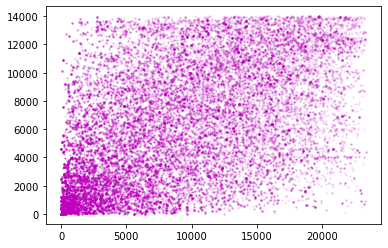

In [18]:
# plt.scatter(all_cards['edhrec_rank'], all_cards['penny_rank'], s = 2,alpha = 0.1, color = 'm')
# plt.show()

In [19]:
# all_cards.loc[all_cards['penny_rank'].idxmin()]

In [20]:
# Normalize EDH rank and penny rank, then get their average as a new column
# Normalizing scale so that 0 is least popular and 1 is most popular
Max_EDH_Rank = max(all_cards['edhrec_rank']) # Worst ranking card
Min_EDH_Rank = min(all_cards['edhrec_rank']) # Best ranking card
all_cards['Normal_EDH_Rank'] = all_cards['edhrec_rank'].apply(lambda x: 1 - (x-Min_EDH_Rank)/(Max_EDH_Rank-Min_EDH_Rank))

In [21]:
# all_cards[['name', 'Normal_EDH_Rank']]

In [22]:
# all_cards.loc[all_cards['Normal_EDH_Rank'].idxmin()]

name                                 flaxen intruder // welcome home
lang                                                              en
released_at                                      2019-10-04 00:00:00
mana_cost                                           {G} // {5}{G}{G}
cmc                                                              1.0
type_line          creature — human berserker // sorcery — adventure
oracle_text                                                      NaN
power                                                              1
toughness                                                          2
colors                                                           [G]
color_identity                                                   [G]
keywords                                                          []
legalities         {'standard': 'not_legal', 'future': 'not_legal...
games                                           [arena, paper, mtgo]
reserved                          

In [34]:
# plt.hist(all_cards['Normal_EDH_Rank'], color = 'g')

In [24]:
# all_cards['Normal_EDH_Rank'].describe()

count    62225.000000
mean         0.605742
std          0.296023
min          0.000000
25%          0.360351
50%          0.653607
75%          0.875530
max          1.000000
Name: Normal_EDH_Rank, dtype: float64

In [25]:
# all_cards['Binary_Rank'] = all_cards['Normal_EDH_Rank'].apply(lambda x: 'Above_Avg' if x >= 0.66 else 'Below_Avg')

In [26]:
# all_cards[['name', 'Normal_EDH_Rank', 'Binary_Rank']]

In [27]:
# drop rows with duplicate names
# keep most recent printing of duplicate

names_dates = all_cards[['name', 'released_at']]
names_dates = names_dates.sort_values(['name', 'released_at'], ascending = [True, False])
names_dates = names_dates.groupby('name',as_index=False).released_at.first()
# unique_cards = all_cards.groupby()

In [28]:
# names_dates
# names_dates.shape

In [29]:
# all_cards.info()
col_names = list(all_cards.columns)

In [30]:
# col_names

In [31]:
# pd.merge(all_cards, names_dates, on = ['name', 'released_at'])

In [32]:
with open('all_cards', 'wb') as f:
    pickle.dump(all_cards,f)
    
with open('names_dates', 'wb') as f:
    pickle.dump(names_dates,f)